In [ ]:
##Alpkaan TANIŞ 170255061 İ.Ö
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import math
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/data-2.xlsx')
df


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
scale_mapper = {"SEKER":0,"BARBUNYA":1, "BOMBAY":2, "CALI":3, "HOROZ":4, "SIRA":5,"DERMASON":6}
df["Class"] = df["Class"].replace(scale_mapper)
print(df)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

In [ ]:
from sklearn.preprocessing import LabelEncoder  ## Kategorik veriyi nümerik hale getirme
le=LabelEncoder()
lea=df['Class']=le.fit_transform(df.Class)
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6


In [ ]:
df.isnull().sum() ## boş değer olup olmadığını kontrol ettim

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

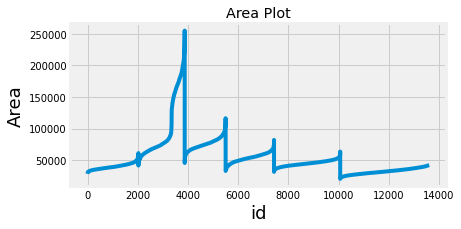

In [ ]:
plt.figure(figsize=(6,3))
plt.title('Area Plot')
plt.plot(df['Area'])
plt.xlabel('id',fontsize=18)
plt.ylabel('Area',fontsize=18)
plt.show()

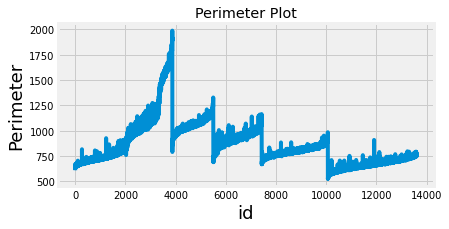

In [ ]:
plt.figure(figsize=(6,3))
plt.title('Perimeter Plot')
plt.plot(df['Perimeter'])
plt.xlabel('id',fontsize=18)
plt.ylabel('Perimeter',fontsize=18)
plt.show()

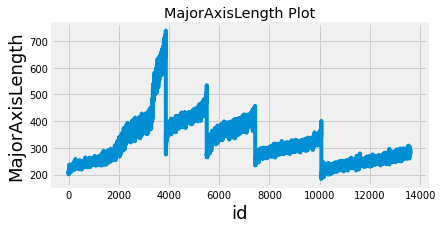

In [ ]:
plt.figure(figsize=(6,3))
plt.title('MajorAxisLength Plot')
plt.plot(df['MajorAxisLength'])
plt.xlabel('id',fontsize=18)
plt.ylabel('MajorAxisLength',fontsize=18)
plt.show()

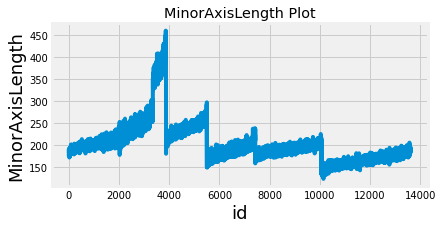

In [ ]:
plt.figure(figsize=(6,3))
plt.title('MinorAxisLength Plot')
plt.plot(df['MinorAxisLength'])
plt.xlabel('id',fontsize=18)
plt.ylabel('MinorAxisLength',fontsize=18)
plt.show()

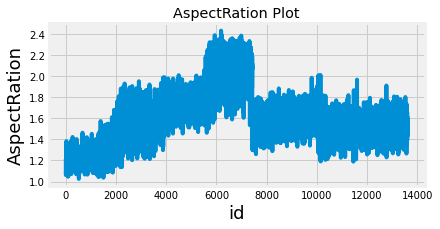

In [ ]:
plt.figure(figsize=(6,3))
plt.title('AspectRation Plot')
plt.plot(df['AspectRation'])
plt.xlabel('id',fontsize=18)
plt.ylabel('AspectRation',fontsize=18)
plt.show()

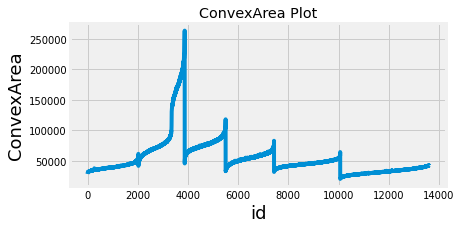

In [ ]:
plt.figure(figsize=(6,3))
plt.title('ConvexArea Plot')
plt.plot(df['ConvexArea'])
plt.xlabel('id',fontsize=18)
plt.ylabel('ConvexArea',fontsize=18)
plt.show()

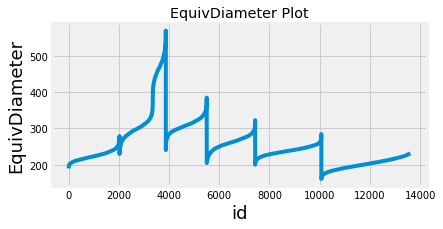

In [ ]:
plt.figure(figsize=(6,3))
plt.title('EquivDiameter Plot')
plt.plot(df['EquivDiameter'])
plt.xlabel('id',fontsize=18)
plt.ylabel('EquivDiameter',fontsize=18)
plt.show()

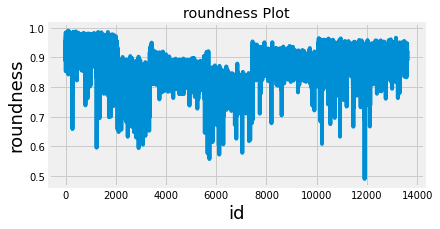

In [ ]:
plt.figure(figsize=(6,3))
plt.title('roundness Plot')
plt.plot(df['roundness'])
plt.xlabel('id',fontsize=18)
plt.ylabel('roundness',fontsize=18)
plt.show()

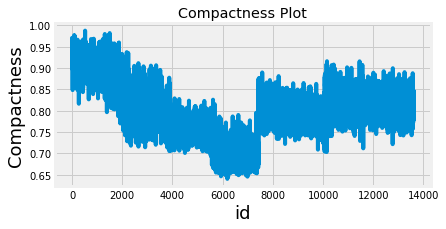

In [ ]:
plt.figure(figsize=(6,3))
plt.title('Compactness Plot')
plt.plot(df['Compactness'])
plt.xlabel('id',fontsize=18)
plt.ylabel('Compactness',fontsize=18)
plt.show()

In [ ]:
X = df.drop(['Extent','Class','Eccentricity','Solidity','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4'], axis=1) #ozellik secme
df.iloc[:,df.columns != "Class"].shape
y=df["Class"]

In [ ]:
X.shape,y.shape

((13611, 9), (13611,))

In [ ]:
model=Sequential()
model.add(Dense(17,input_dim=9,activation='relu',use_bias=True))
model.add(Dense(12))
model.add(Activation('relu'))
model.add(Dense(3,use_bias=True))
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax',use_bias=True))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                170       
                                                                 
 dense_1 (Dense)             (None, 12)                216       
                                                                 
 activation (Activation)     (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
 dense_3 (Dense)             (None, 7)                 28        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable pa

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=99)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle=True)
print(X_train.shape,X_test.shape,X_valid.shape)
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)
X_valid = StandardScaler().fit_transform(X_valid)
print((y_valid).shape)
print((y_test).shape)
print((y_train).shape)

(9799, 9) (2723, 9) (1089, 9)
(1089,)
(2723,)
(9799,)


In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=1000,batch_size=50)

Epoch 1/1000
196/196 [==============================] - 1s 3ms/step - loss: 1.5989 - accuracy: 0.2888 - val_loss: 1.1423 - val_accuracy: 0.5179
Epoch 2/1000
196/196 [==============================] - 0s 2ms/step - loss: 0.7969 - accuracy: 0.7167 - val_loss: 0.5691 - val_accuracy: 0.8127
Epoch 3/1000
196/196 [==============================] - 1s 3ms/step - loss: 0.5059 - accuracy: 0.8109 - val_loss: 0.4613 - val_accuracy: 0.8173
Epoch 4/1000
196/196 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8256 - val_loss: 0.4242 - val_accuracy: 0.8274
Epoch 5/1000
196/196 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8509 - val_loss: 0.3969 - val_accuracy: 0.8485
Epoch 6/1000
196/196 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8766 - val_loss: 0.3559 - val_accuracy: 0.8806
Epoch 7/1000
196/196 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8899 - val_loss: 0.3232 - val_accuracy:

In [ ]:
scores=model.evaluate(X_test,y_test,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)

2723/2723 [==============================] - 5s 2ms/step - loss: 0.2120 - accuracy: 0.9254
Loss: 0.21203431487083435
Accuracy: 92.54498481750488


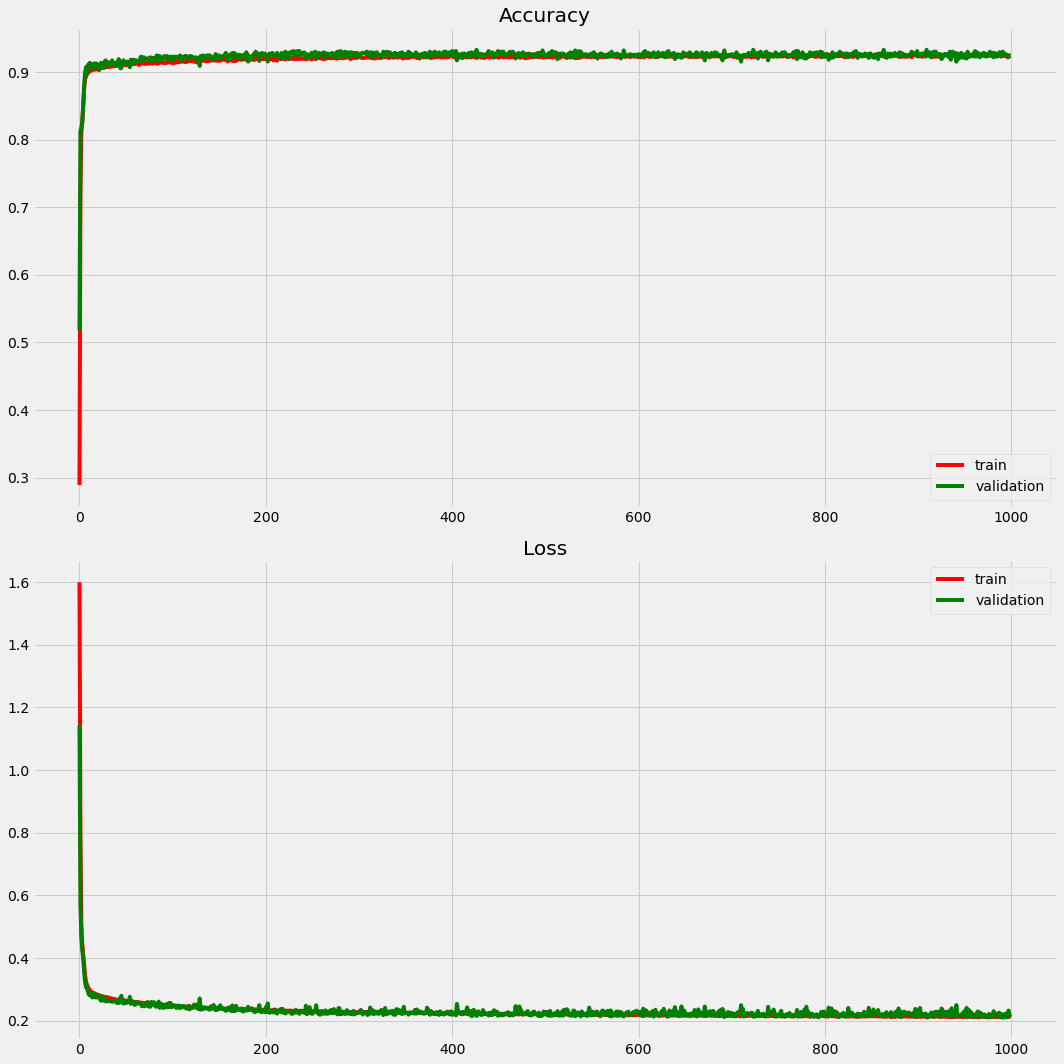

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='g',label='validation')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='g',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

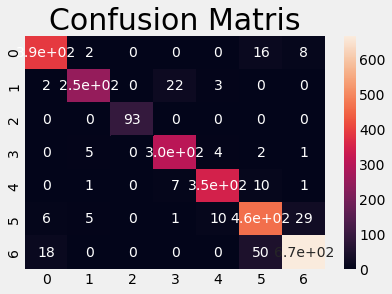

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred[0]

conf = confusion_matrix(y_test, y_pred)
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf, annot = True)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))
print("--------------")
print(conf)
print("----------------")
Sensitivity=conf[0][0]/(conf[0][0]+conf[1][0])
Specificity=conf[1][1]/(conf[1][1]+conf[0][1])
print("Specificity",Specificity)
print("Sensitivity",Sensitivity)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       417
           1       0.95      0.90      0.93       275
           2       1.00      1.00      1.00        93
           3       0.91      0.96      0.94       317
           4       0.95      0.95      0.95       370
           5       0.86      0.90      0.88       516
           6       0.94      0.91      0.93       735

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

--------------
[[391   2   0   0   0  16   8]
 [  2 248   0  22   3   0   0]
 [  0   0  93   0   0   0   0]
 [  0   5   0 305   4   2   1]
 [  0   1   0   7 351  10   1]
 [  6   5   0   1  10 465  29]
 [ 18   0   0   0   0  50 667]]
----------------
Specificity 0.992
Sensitivity 0.9949109414758269


In [ ]:
model_adamax=Sequential()
model_adamax.add(Dense(17,input_dim=9,activation='relu',use_bias=True))
model_adamax.add(Dense(12))
model_adamax.add(Activation('relu'))
model_adamax.add(Dense(3,use_bias=True))
model_adamax.add(Activation('relu'))
model_adamax.add(Dense(7,activation='softmax',use_bias=True))
model_adamax.summary()
model_adamax.compile(loss='sparse_categorical_crossentropy',optimizer='adamax',metrics=['accuracy'])
history_adamax=model_adamax.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                170       
                                                                 
 dense_1 (Dense)             (None, 12)                216       
                                                                 
 activation (Activation)     (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
 dense_3 (Dense)             (None, 7)                 28        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable pa

In [ ]:
model_adadelta=Sequential()
model_adadelta.add(Dense(17,input_dim=9,activation='relu',use_bias=True))
model_adadelta.add(Dense(12))
model_adadelta.add(Activation('relu'))
model_adadelta.add(Dense(3,use_bias=True))
model_adadelta.add(Activation('relu'))
model_adadelta.add(Dense(7,activation='softmax',use_bias=True))
model_adadelta.summary()
model_adadelta.compile(loss='sparse_categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
history_adadelta=model_adamax.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 17)                170       
                                                                 
 dense_5 (Dense)             (None, 12)                216       
                                                                 
 activation_2 (Activation)   (None, 12)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                 39        
                                                                 
 activation_3 (Activation)   (None, 3)                 0         
                                                                 
 dense_7 (Dense)             (None, 7)                 28        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable 

In [ ]:
model_adagrad=Sequential()
model_adagrad.add(Dense(17,input_dim=9,activation='relu',use_bias=True))
model_adagrad.add(Dense(12))
model_adagrad.add(Activation('relu'))
model_adagrad.add(Dense(3,use_bias=True))
model_adagrad.add(Activation('relu'))
model_adagrad.add(Dense(7,activation='softmax',use_bias=True))
model_adagrad.summary()
model_adagrad.compile(loss='sparse_categorical_crossentropy',optimizer='adagrad',metrics=['accuracy'])
history_adagrad=model_adagrad.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 17)                170       
                                                                 
 dense_9 (Dense)             (None, 12)                216       
                                                                 
 activation_4 (Activation)   (None, 12)                0         
                                                                 
 dense_10 (Dense)            (None, 3)                 39        
                                                                 
 activation_5 (Activation)   (None, 3)                 0         
                                                                 
 dense_11 (Dense)            (None, 7)                 28        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable 

In [ ]:
model_FTRL=Sequential()
model_FTRL.add(Dense(17,input_dim=9,activation='relu',use_bias=True))
model_FTRL.add(Dense(12))
model_FTRL.add(Activation('relu'))
model_FTRL.add(Dense(3,use_bias=True))
model_FTRL.add(Activation('relu'))
model_FTRL.add(Dense(7,activation='softmax',use_bias=True))
model_FTRL.summary()
model_FTRL.compile(loss='sparse_categorical_crossentropy',optimizer='FTRL',metrics=['accuracy'])
history_FTRL=model_FTRL.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 17)                170       
                                                                 
 dense_13 (Dense)            (None, 12)                216       
                                                                 
 activation_6 (Activation)   (None, 12)                0         
                                                                 
 dense_14 (Dense)            (None, 3)                 39        
                                                                 
 activation_7 (Activation)   (None, 3)                 0         
                                                                 
 dense_15 (Dense)            (None, 7)                 28        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable 

In [ ]:
model_nadam=Sequential()
model_nadam.add(Dense(17,input_dim=9,activation='relu',use_bias=True))
model_nadam.add(Dense(12))
model_nadam.add(Activation('relu'))
model_nadam.add(Dense(3,use_bias=True))
model_nadam.add(Activation('relu'))
model_nadam.add(Dense(7,activation='softmax',use_bias=True))
model_nadam.summary()
model_nadam.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
history_nadam=model_nadam.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 17)                170       
                                                                 
 dense_17 (Dense)            (None, 12)                216       
                                                                 
 activation_8 (Activation)   (None, 12)                0         
                                                                 
 dense_18 (Dense)            (None, 3)                 39        
                                                                 
 activation_9 (Activation)   (None, 3)                 0         
                                                                 
 dense_19 (Dense)            (None, 7)                 28        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable 

In [ ]:
model_rmsprop=Sequential()
model_rmsprop.add(Dense(17,input_dim=9,activation='relu',use_bias=True))
model_rmsprop.add(Dense(12))
model_rmsprop.add(Activation('relu'))
model_rmsprop.add(Dense(3,use_bias=True))
model_rmsprop.add(Activation('relu'))
model_rmsprop.add(Dense(7,activation='softmax',use_bias=True))
model_rmsprop.summary()
model_rmsprop.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history_rmsprop=model_rmsprop.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 17)                170       
                                                                 
 dense_21 (Dense)            (None, 12)                216       
                                                                 
 activation_10 (Activation)  (None, 12)                0         
                                                                 
 dense_22 (Dense)            (None, 3)                 39        
                                                                 
 activation_11 (Activation)  (None, 3)                 0         
                                                                 
 dense_23 (Dense)            (None, 7)                 28        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable 

In [ ]:
model_sgd=Sequential()
model_sgd.add(Dense(17,input_dim=9,activation='relu',use_bias=True))
model_sgd.add(Dense(12))
model_sgd.add(Activation('relu'))
model_sgd.add(Dense(3,use_bias=True))
model_sgd.add(Activation('relu'))
model_sgd.add(Dense(7,activation='softmax',use_bias=True))
model_sgd.summary()
model_sgd.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
history_sgd=model_sgd.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=200,batch_size=50)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 17)                170       
                                                                 
 dense_25 (Dense)            (None, 12)                216       
                                                                 
 activation_12 (Activation)  (None, 12)                0         
                                                                 
 dense_26 (Dense)            (None, 3)                 39        
                                                                 
 activation_13 (Activation)  (None, 3)                 0         
                                                                 
 dense_27 (Dense)            (None, 7)                 28        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable 

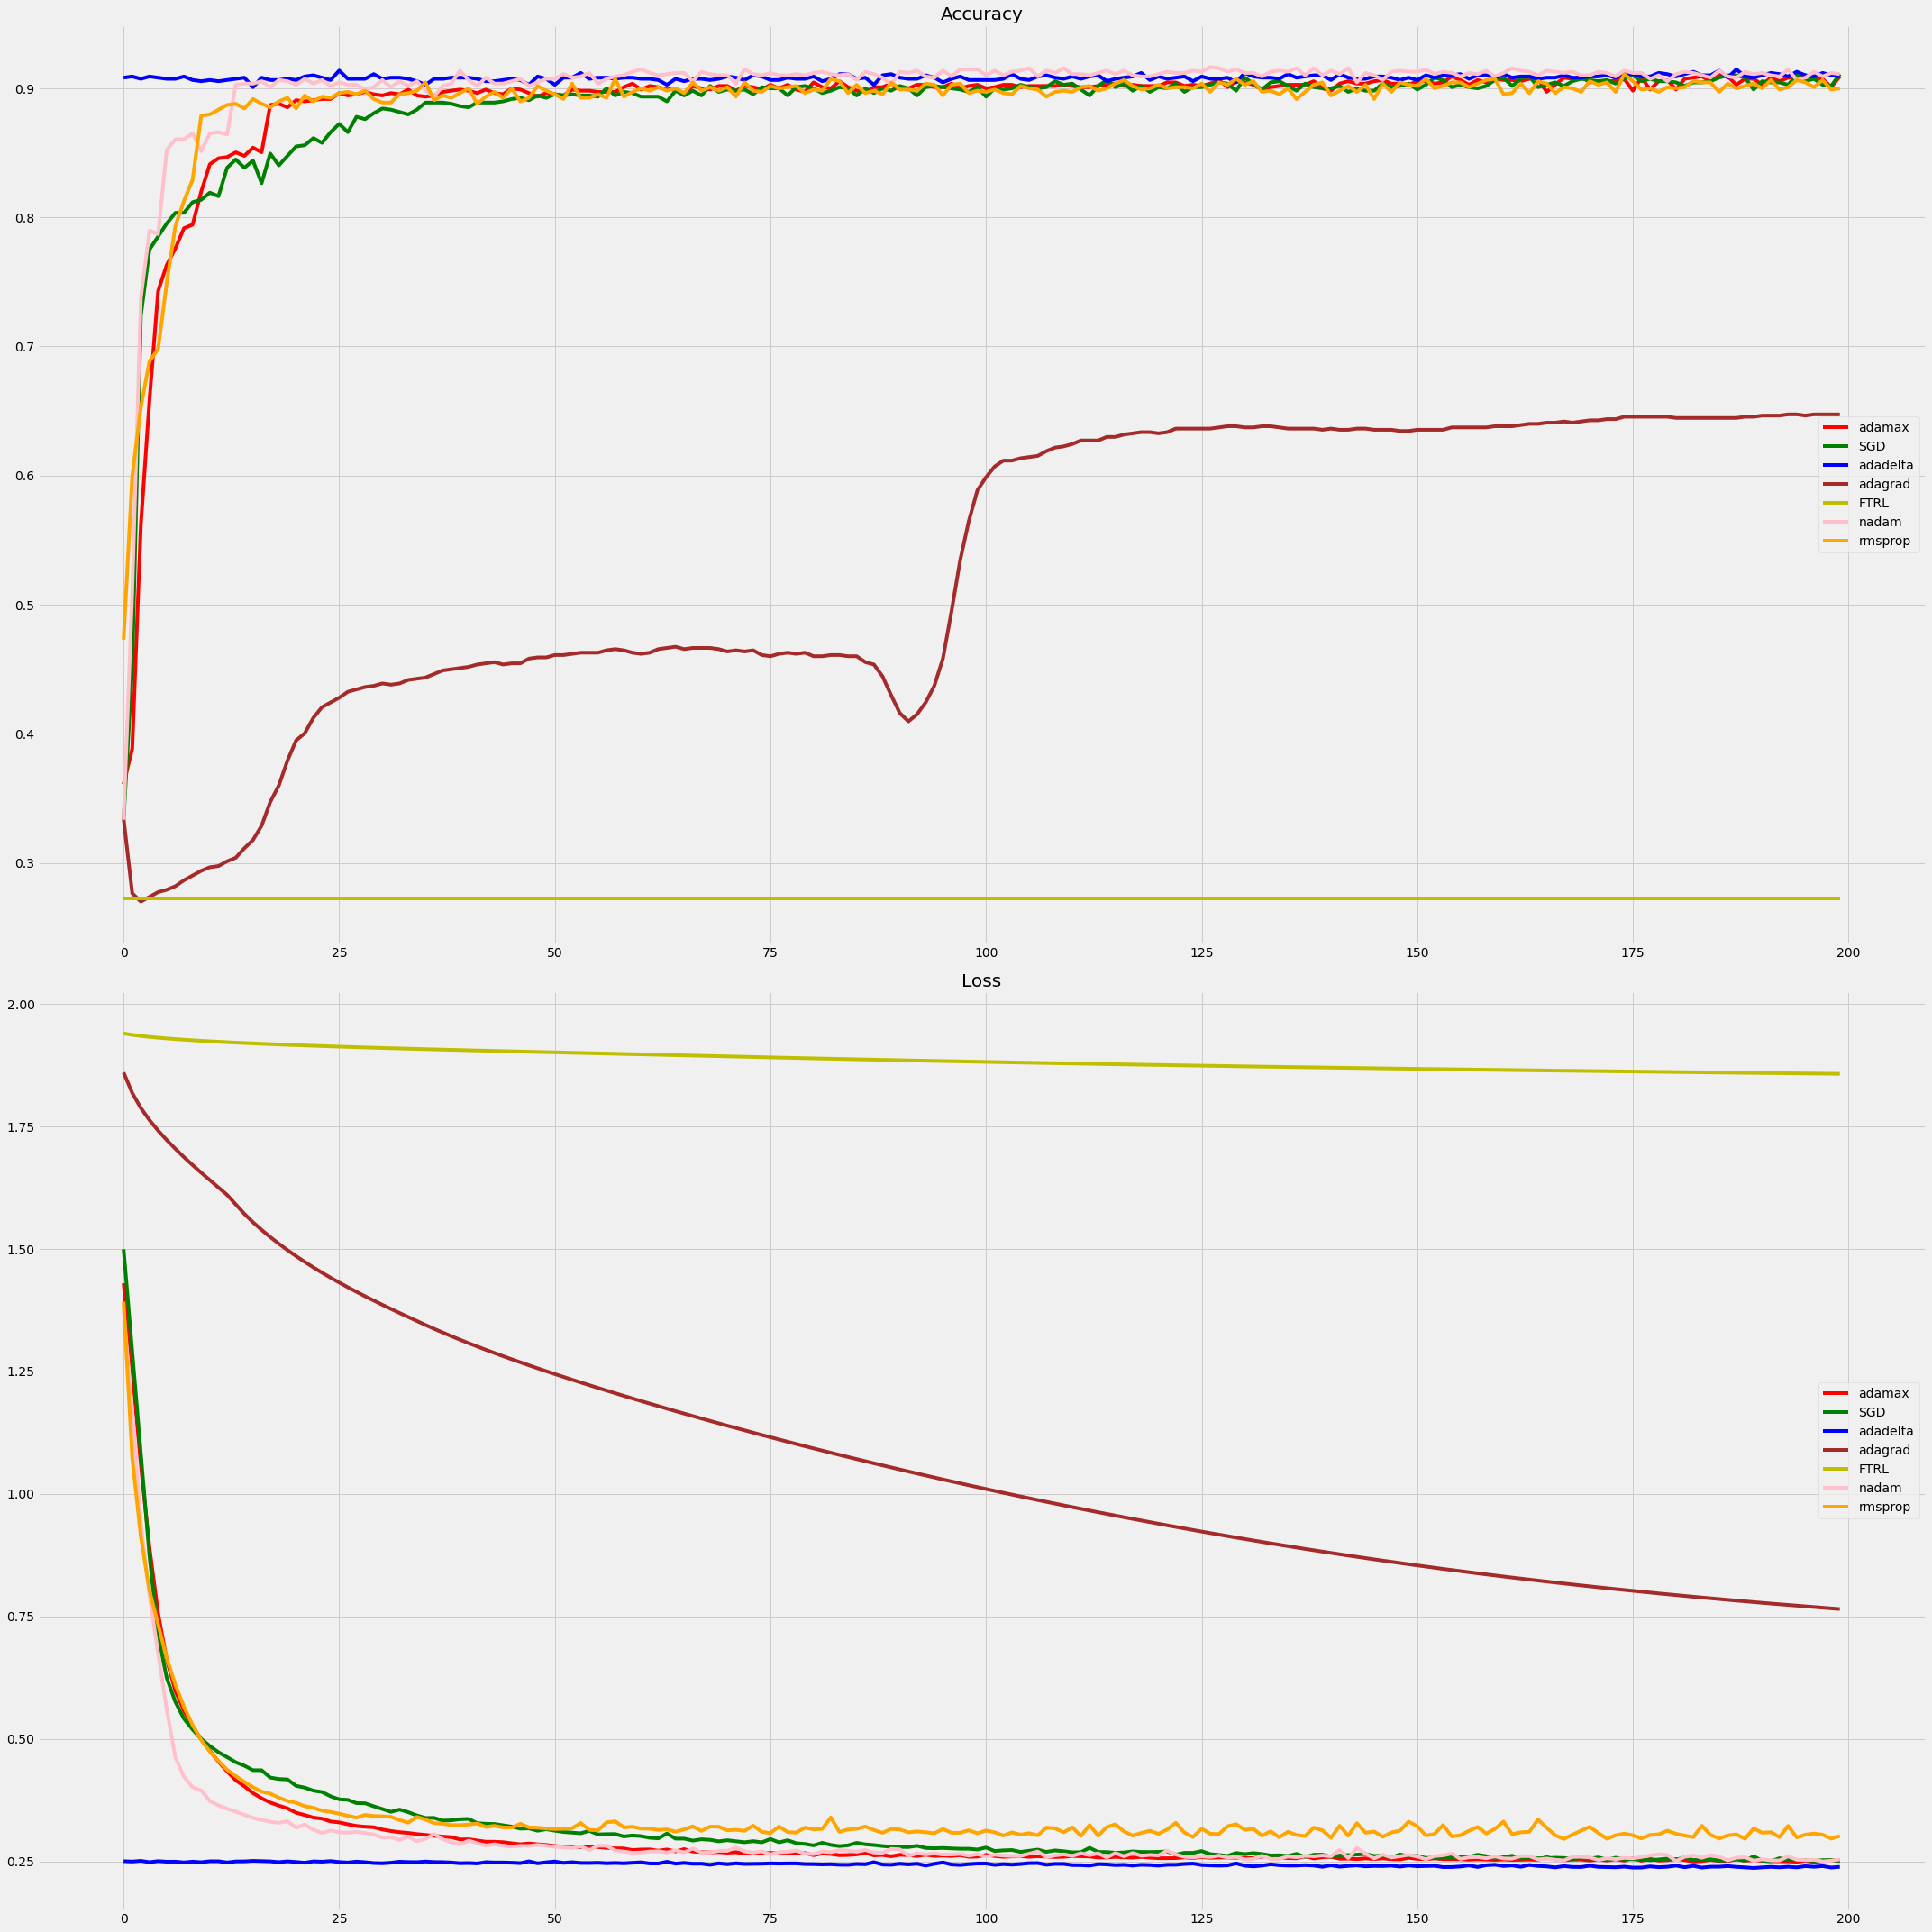

In [ ]:
history=[history_sgd,history_adamax,history_adadelta,history_adagrad,history_FTRL,history_nadam,history_rmsprop]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30,30))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history_adamax.history["val_accuracy"],color='r',label='adamax')
plt.plot(history_sgd.history["val_accuracy"],color='g',label='SGD')
plt.plot(history_adadelta.history["val_accuracy"],color='b',label='adadelta')
plt.plot(history_adagrad.history["val_accuracy"],color='brown',label='adagrad')
plt.plot(history_FTRL.history["val_accuracy"],color='y',label='FTRL')
plt.plot(history_nadam.history["val_accuracy"],color='pink',label='nadam')
plt.plot(history_rmsprop.history["val_accuracy"],color='orange',label='rmsprop')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history_adamax.history["val_loss"],color='r',label='adamax')
plt.plot(history_sgd.history["val_loss"],color='g',label='SGD')
plt.plot(history_adadelta.history["val_loss"],color='b',label='adadelta')
plt.plot(history_adagrad.history["val_loss"],color='brown',label='adagrad')
plt.plot(history_FTRL.history["val_loss"],color='y',label='FTRL')
plt.plot(history_nadam.history["val_loss"],color='pink',label='nadam')
plt.plot(history_rmsprop.history["val_loss"],color='orange',label='rmsprop')
plt.legend(loc='best')
plt.tight_layout()
plt.show()